~~~
Introduction: cemgil-ml-tutorial-is-bankasi2018.pdf

Supervised Learning, Linear Regression: Regression.ipynb

Regularization, Feature selection: RobustRegression.ipynb

Classification, Logistic Regression: LogisticRegression.ipynb

Naive Bayes, k-nearest neighbors, decision trees, model evaluation :
DecisionTree.ipynb, KNN.ipynb

Optimization, Gradient Descent, Newton's method, Momentum 
GradientDescent.ipynb

Artificial Neural Networks (ANNs) 
Deep Learning Frameworks, PyTorch, Automatic Differentiation 
MultiLayerPerceptron.ipynb, AutomaticDifferentiation.ipynb

Unsupervised Learning, k-means clustering 


Dimensionality reduction, Singular Value Decomposition, Principal Component Analysis, Recommendation systems 
~~~

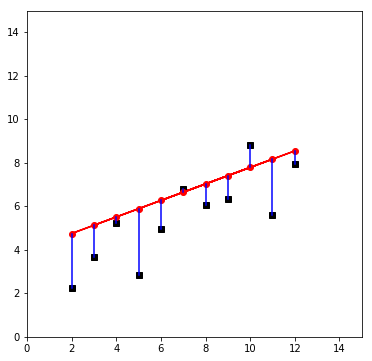

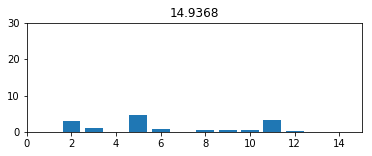

In [75]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])-2
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])-2
#y = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])-2
#y = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])-2

def plot_fit(w1, w0):
    f = w0 + w1*x

    plt.figure(figsize=(6,6))
    plt.plot(x,y,'sk')
    plt.plot(x,f,'o-r')
    #plt.axis('equal')
    plt.xlim((0,15))
    plt.ylim((0,15))
    for i in range(len(x)):
        plt.plot((x[i],x[i]),(f[i],y[i]),'b')
    plt.show()
    plt.figure(figsize=(6,2))
    plt.bar(x,(f-y)**2/2)
    plt.title(np.sum((f-y)**2/2))
    plt.ylim((0,30))
    plt.xlim((0,15))
    plt.show()
    
plot_fit(0.38,3.99)

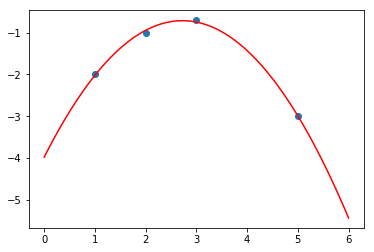

array([-3.98363636,  2.40272727, -0.44090909])

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Setup data
x = np.array([1,2,3,5])
y = np.array([-2, -1, -0.7, -3])

# Setup the Design matrix
N = len(x)
A = np.vstack( [np.ones(N), x, x**2] ).T
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

# Plot results
xx = np.linspace(0,6,100)
NN = len(xx)
AA = np.vstack( [np.ones(NN), xx, xx**2] ).T
f_pred = AA.dot(w_ls)
plt.plot(x, y, 'o')
plt.plot(xx, f_pred, '-r')
plt.show()
w_ls

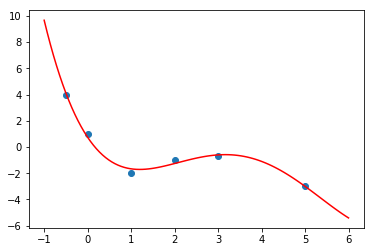

array([ 0.73610997, -4.95454215,  3.215489  , -0.71527962,  0.04808533])

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Setup data
x = np.array([-0.5, 0, 1,2,3,5])
y = np.array([4, 1, -2, -1, -0.7, -3])

# Setup the Design matrix
Order = 4
A = np.array([x**p for p in range(Order+1)]).T
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

# Plot results
xx = np.linspace(-1,6,100)
AA = np.array([xx**p for p in range(Order+1)]).T
f_pred = AA.dot(w_ls)
plt.plot(x, y, 'o')
plt.plot(xx, f_pred, '-r')
plt.show()
w_ls

In [46]:
Order = 1
A = np.array([x**p for p in range(Order+1)]).T
A

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 5]])

In [36]:
w = np.polyfit(x,y, 2)
w

array([-0.44090909,  2.40272727, -3.98363636])

In [64]:
z = np.array([4, 8, 16, 30])
N = len(z)

y = z[1:].reshape(N-1,1)
A = z[:-1].reshape(N-1,1)

w_ls,E,rank,sigma = np.linalg.lstsq(A, y )
w_ls

array([[ 1.9047619]])

In [62]:
z[-1]*w_ls

array([[ 73.79672131]])

In [65]:
import scipy as sc
import scipy.linalg as la

# Order
L = 2

def AR_model(y,L):
    N = len(y) - L
    A = np.hstack((np.matrix(y[L-i:L-i+N]) for i in range(1,L+1) ))
    yy = np.matrix(y[L:(L+N+1)])
    return A, yy
   
def make_AR_model(y, L):
    B = la.toeplitz(y[:-1], y[0:L])
    AA = B[L-1:,:]
    yy = y[L:]
    return AA, yy

A,yy = AR_model(y, L)
#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, yy)

f = A*w_ls



In [74]:
z = np.array([-1, 1.2, -1.7, 1.1, -1.9])

L = 2
A,y = make_AR_model(z, L)

print(A)
print(y)

w_ls,E,rank,sigma = np.linalg.lstsq(A, y )
w_ls

[[ 1.2 -1. ]
 [-1.7  1.2]
 [ 1.1 -1.7]]
[-1.7  1.1 -1.9]


array([-0.01244109,  1.16068031])